In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#index_col = indice de nuestro dataset que es la fecha para este caso
#parse_dates = conversión a tipo fecha
df = pd.read_csv('macrodata.csv', index_col = 0, parse_dates = True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


[Text(0, 0.5, 'Real GDP')]

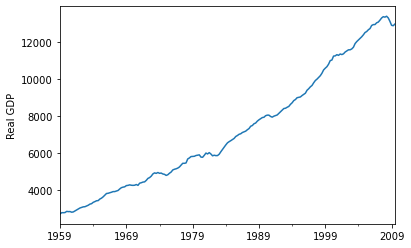

In [12]:
ax = df['realgdp'].plot()
ax.autoscale(axis = 'x', tight = True)
ax.set(ylabel = "Real GDP")

<function matplotlib.pyplot.show(*args, **kw)>

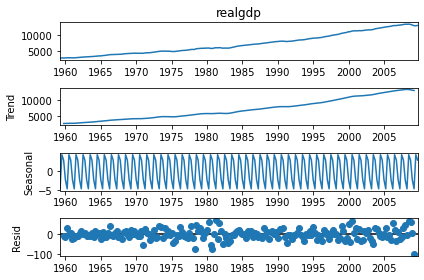

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_add = seasonal_decompose(df['realgdp'], model ="additive")
s_dec_add.plot()
plt.show

In [33]:
#obteniendo la tendencia hodrick prescott
from statsmodels.tsa.filters.hp_filter import hpfilter
#devuelve el ciclo y la tendencia en 2 variables diferentes
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb = 1600)


In [19]:
df['trend'] = gdp_trend

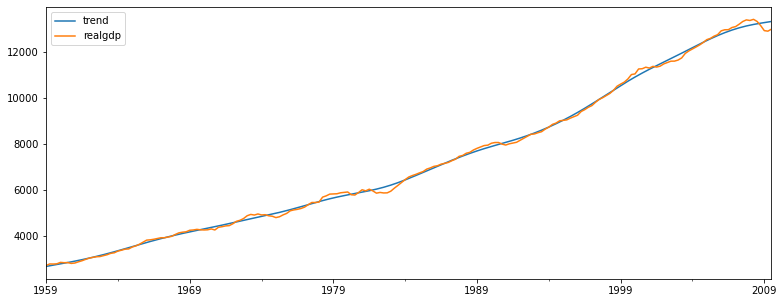

In [32]:
df[['trend', 'realgdp']].plot(figsize = (13,5))

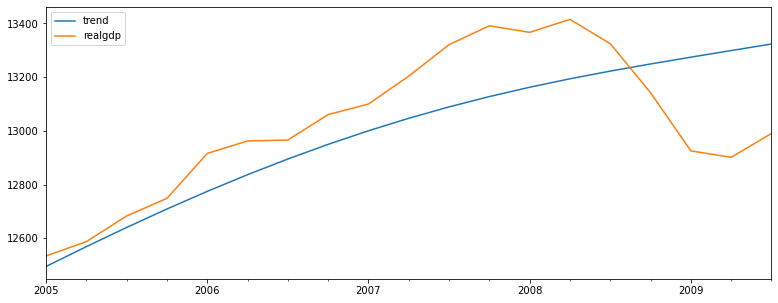

In [35]:
#Columnas que llamamos y el indice, para este caso tomaremos el indice desde 2005 en adelante
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize = (13,5))